<a href="https://colab.research.google.com/github/Lokopoko/Ping-Android/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
df = web.DataReader('ICICIBANK.NS', data_source='yahoo', start='2010-01-01', end='2021-01-15')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,160.909088,159.090912,159.454544,159.945450,9162186.0,136.021439
2010-01-05,163.590912,160.272720,161.454544,161.463638,14659997.0,137.312576
2010-01-06,164.972733,161.836365,162.727264,162.699997,20410054.0,138.363998
2010-01-07,163.045456,159.363632,163.045456,161.163635,10852286.0,137.057449
2010-01-08,161.818176,158.363632,161.654541,158.899994,20580934.0,135.132385
...,...,...,...,...,...,...
2021-01-11,546.000000,535.000000,545.150024,544.700012,19394393.0,544.700012
2021-01-12,550.650024,537.099976,541.000000,548.000000,16388310.0,548.000000
2021-01-13,561.000000,548.250000,551.500000,556.500000,21920297.0,556.500000


In [3]:
df.shape

(2722, 6)

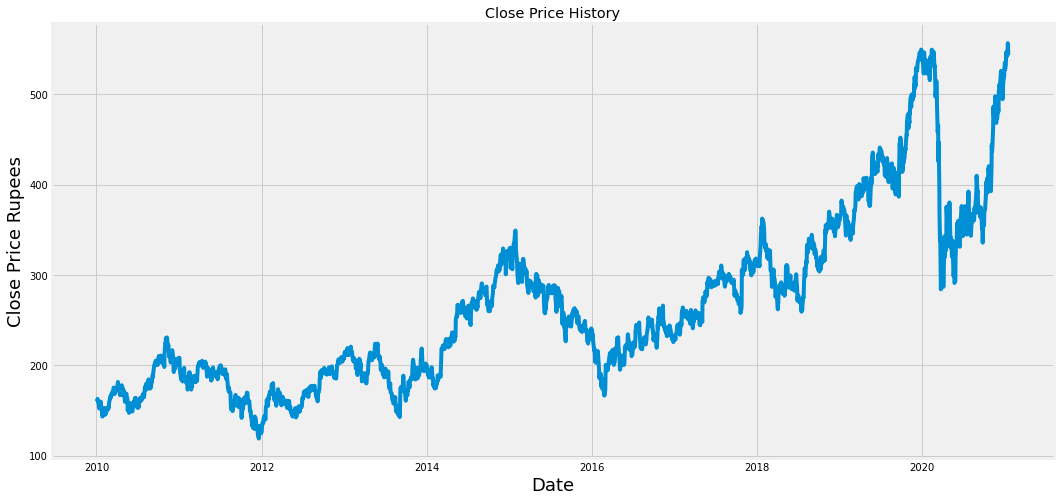

In [27]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees', fontsize=18)
plt.show()

In [28]:
data = df.filter(['Close'])

dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2178

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.09400376],
       [0.09747232],
       [0.10029699],
       ...,
       [1.        ],
       [0.99268903],
       [0.96915696]])

In [30]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.09400376, 0.09747232, 0.10029699, 0.09678691, 0.09161524,
       0.0897252 , 0.07865493, 0.07778263, 0.07556026, 0.07853033,
       0.08721209, 0.08810516, 0.09327684, 0.08278812, 0.07780337,
       0.07369099, 0.0556213 , 0.05593286, 0.07350403, 0.07576796,
       0.06878932, 0.07728415, 0.07286018, 0.06012834, 0.0631192 ,
       0.06604772, 0.06081375, 0.07171784, 0.06810391, 0.07437637,
       0.07790722, 0.07753337, 0.07483333, 0.07402329, 0.08073193,
       0.0779903 , 0.08233119, 0.09086754, 0.1012524 , 0.10590482,
       0.10177166, 0.10316322, 0.1123019 , 0.11288346, 0.1098303 ,
       0.1152512 , 0.1176605 , 0.1123019 , 0.11510583, 0.12260369,
       0.12887614, 0.12592684, 0.11707894, 0.11302883, 0.11649739,
       0.12216751, 0.12428603, 0.12727688, 0.12424451, 0.1243068 ])]
[0.13789019507579314]



In [31]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [32]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2118, 60, 1)

In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2118/2118 [==============================] - 51s 23ms/step - loss: 0.0015


In [36]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [37]:
x_test = np.array(x_test)

In [38]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [39]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [40]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9.712007690878476

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show>

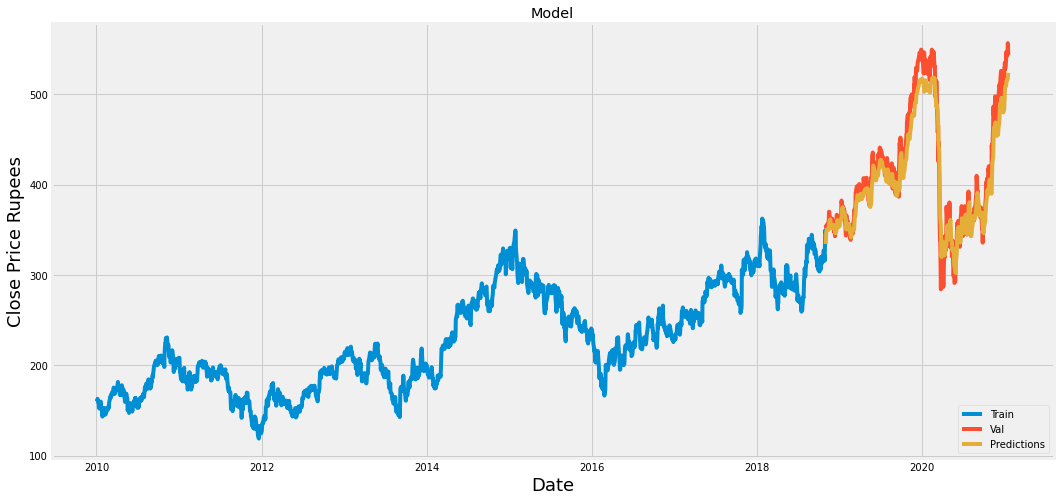

In [41]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [42]:
valid

,Close,Predictions
Date,,
2018-10-31,355.000000,334.129608
2018-11-01,353.700012,341.776154
2018-11-02,354.450012,347.162903
2018-11-05,349.649994,350.295563
2018-11-06,353.100006,350.316925
...,...,...
2021-01-11,544.700012,515.630676
2021-01-12,548.000000,516.359680
2021-01-13,556.500000,517.778625


In [43]:
mahindra_quote = web.DataReader('ICICIBANK.NS', data_source='yahoo', start='2010-01-01', end='2021-01-15')
new_df = mahindra_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[521.8467]]
